<a href="https://colab.research.google.com/github/Prajjwal17/Data-Analytics-Projects-/blob/main/Future_Predictions_of_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

In [ ]:
style.use('ggplot')

In [ ]:
# Fetching data from Yahoo Finance
stock_symbol = "SUZLON.NS"
start_date = "2022-10-01"
end_date = "2023-08-01"
df = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# hl_percent denote high and low percentage

df['hl_percentage'] = (df['High'] - df['Low']) / df['Close'] * 100.0
df['percent_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [ ]:
forecast_col = 'Close'
forecast_out = int(np.ceil(0.1 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [ ]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = pd.DataFrame(X).tail(forecast_out)
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-19-f88dfa4a59f4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# Train Linear Regression model
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
# Make predictions
forecast_set = clf.predict(X_lately)

# Create a new column 'Forest' with NaN values
df['Forecast'] = np.nan

In [ ]:
# Add forecasted values to the DataFrame
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [ ]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += 86400
  df.at[next_date, 'Forecast'] = i

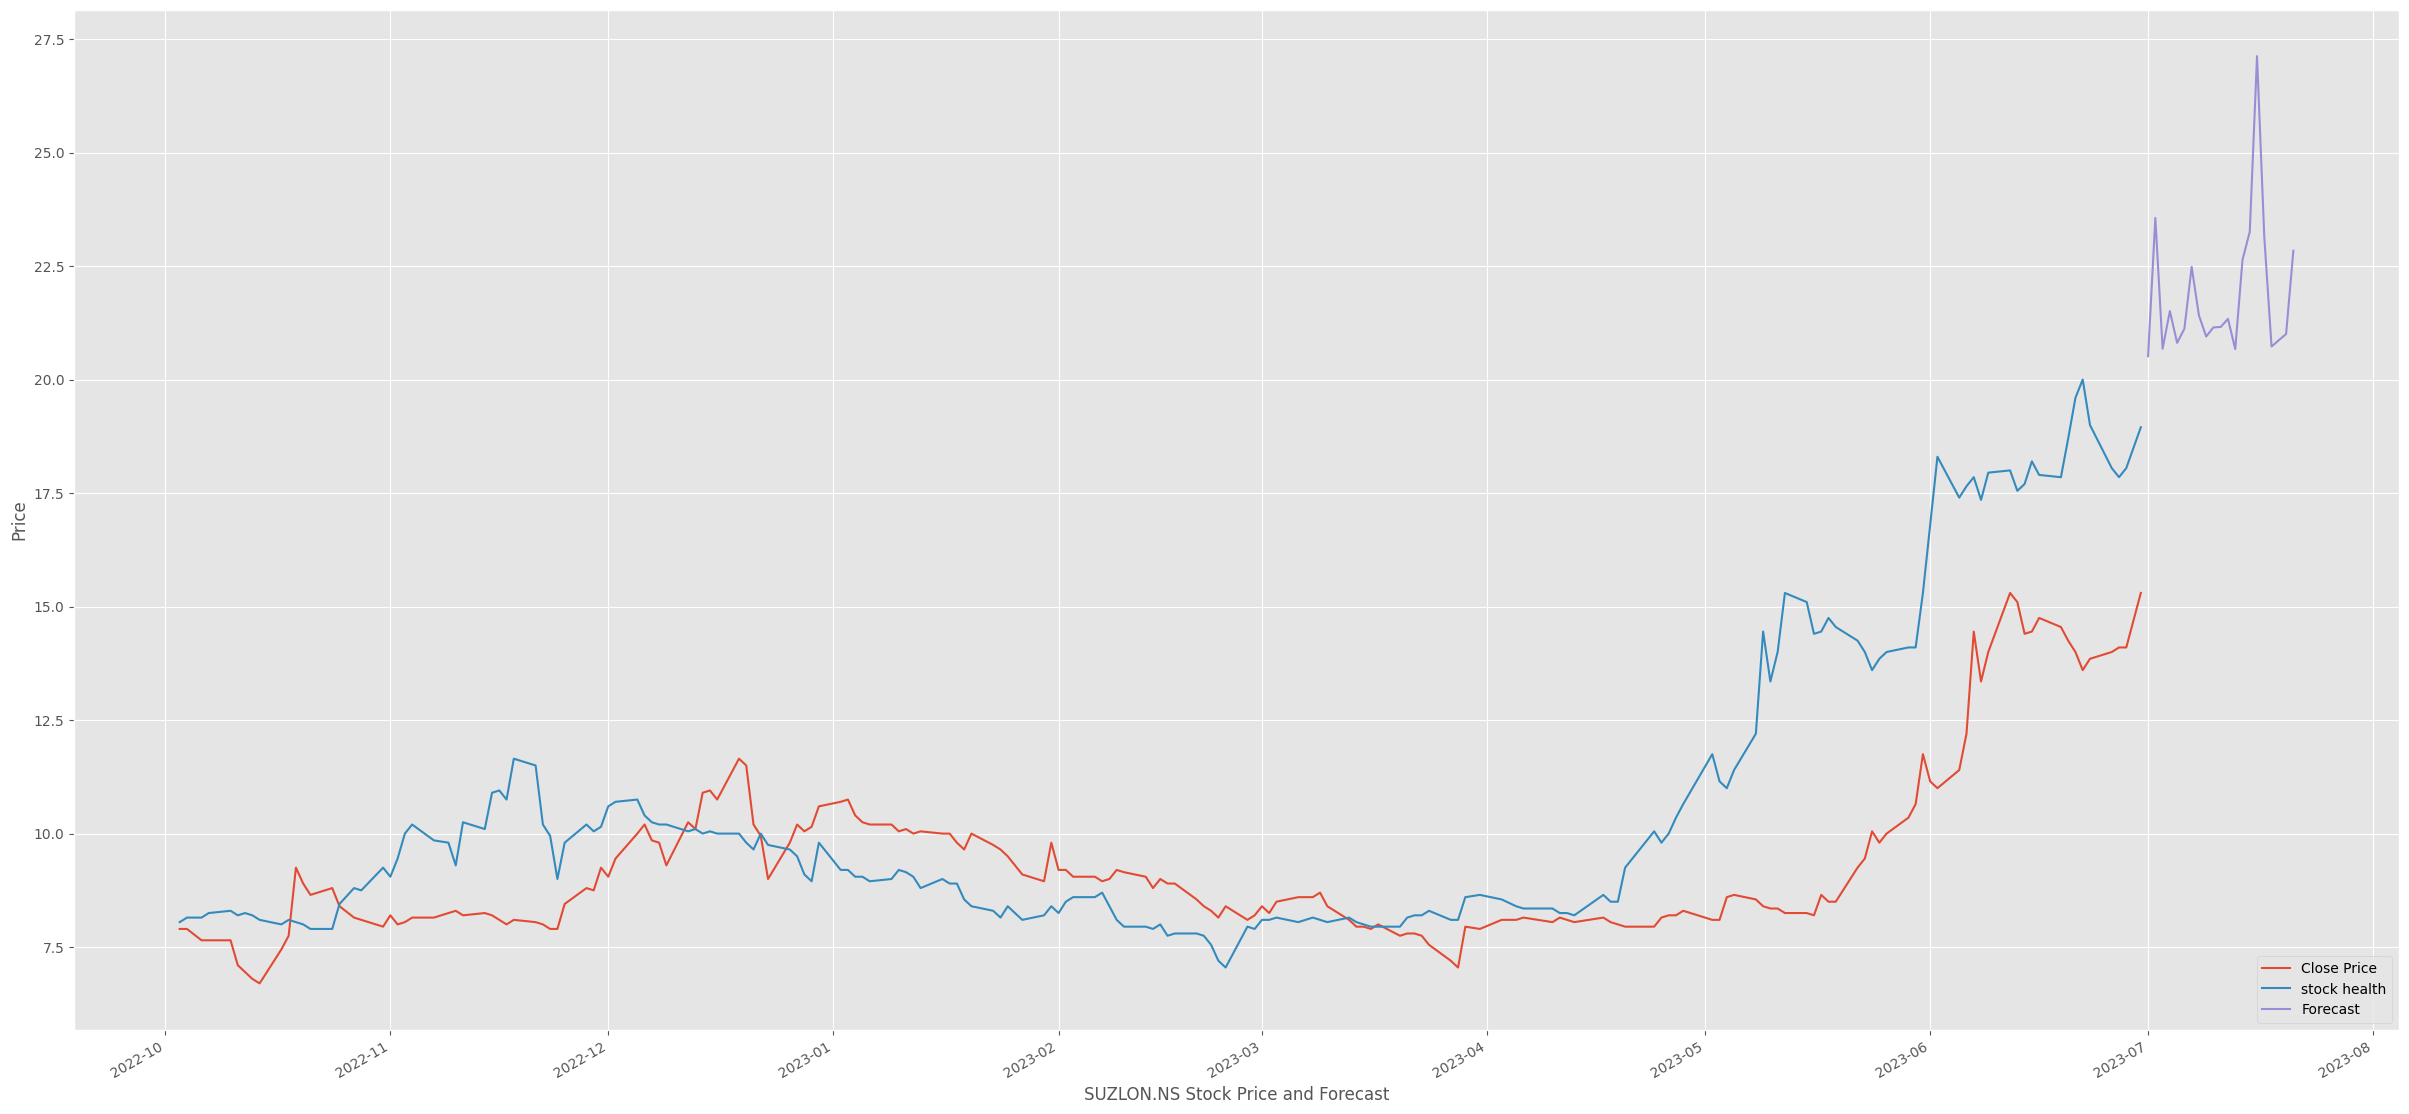

In [ ]:
# Plotting
plt.figure(figsize=(30, 15)) # We can adjust fgure size if needed
df['Close'].plot()
df['label'].plot()
df['Forecast'].plot()
plt.legend(['Close Price', 'stock health', 'Forecast'], loc=4) # Adding legend labels
plt.xlabel('Date')
plt.ylabel('Price')
plt.xlabel('SUZLON.NS Stock Price and Forecast')
plt.show()